In [1]:
from IPython.display import display, Markdown, set_matplotlib_formats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.labelsize': 'large'
})

 # Tuljava v magnetnem polju

V zunanjem magnetnem polju na telo z magnetnim momentom deluje navor

$$\vec M = \vec p_m \times \vec B.$$

Magnetni moment za tuljavo s presekom $S$ in $N$ zankami, skozi katere teče tok $I$, je

$$\vec p_m = NI \vec S,$$

pri čemer je smer vektorja določen s premikanjem vijaka, ki ga sučemo v smeri toka skozi zanko. Poleg tega lahko z Biot-Savartovim zakonom določimo velikost gostote polja v središču Helmholzove tuljave.

$$B = A\frac{\mu_0 N_H I_H}{R_H},$$

pri čemer $R_H$ premer tuljav, vsake s $N_H$ ovoji na posamezni tuljavi in tokom $I_H$. $A$ je številska konstanta $\left( \frac{4}{5} \right)^{\frac{3}{2}}$. Smer je zopet določena z desnosučnim vijakom, ki ga vrtimo v smeri toka. To polje je blizu središča dober približek komogenega polja.

![alt](B.png)

## Namen

Z meritvijo navora na tuljavo v polju Helmholzove tuljave določiti indukcijsko konstanto.

## Pribor

Helmholzova tuljava, merilna tuljava, stojalo s torzijskim merilcem sile (navora), tokovna usmernika za Helmholzovo in merilno tuljavo.

## Meritve

Izmerimo, da ima mala tuljava premer 6 cm in preštejemo, da ima 3 ovoje.

In [2]:
R, ΔR = 6.0e-2, 0.5e-3
N = 3

Za polmer Helmholzove tuljave izmerimo 200 mm, navojev ne preštejemo,  v navodilih je navedeno število 154.

In [3]:
R_H, ΔR_H = 20e-2, 0.5e-3
N_H = 154

Sila na silomeru je preračunana na ročico, katere dvakratna dolžina je 11.5 cm.

In [4]:
r, Δr = 11.5e-2, 0.5e-3

In [5]:
I = np.array([
    1.08, 2.00, 3.10
])
I_H = np.array([
    [-3.06, -2.01, -1.08,  0.00,  0.00,  0.99,  2.09,  3.10],
    [-3.11, -2.28, -1.08,  0.00,  0.00,  0.99,  2.03,  3.03],
    [-3.01, -2.20, -1.00,  0.00,  0.00,  1.03,  2.10,  3.11]
])
F = 1e-4 * np.array([
    [ -7.3,  -5.0,  -2.6,   0.0,  0.0,   2.2,   5.1,   7.7],
    [-14.6, -10.8,  -5.9,  -0.1,  0.0,   4.9,   9.8,  14.5],
    [-20.0, -15.0,  -7.4,  -0.1,  -0.1,   7.8,  15.0,  21.9]
])

## Račun


Pri meritvah sta $\vec p_m$ in $\vec B$ kar pravokotna, zato je velikost navora

$$M = A \frac{\mu_0 N I S N_H I_H}{R_H}.$$

Skozi izmerjeno želimo potegniti premico, a za to imamo en parameter preveč. Zato navor delimo s tokom. Ker je po drugi strani navor $M = Fr$, dobimo premico

$$\frac{F}{I} = \left[ A \frac{\mu_0 N S N_H}{R_H r} \right] I_H = k I_H,$$

katere naklon $k$ poračunamo z linearno regresijo.

In [6]:
A = (4/5)**(3/2)
S = np.pi * R**2
F_by_I = (F.T / I).T
par, cov = np.polyfit(I_H.flatten(), F_by_I.flatten(), 1, cov=True)
k, σ_k = par[0], np.sqrt(cov[0,0])

Zdaj iz naklona izrazimo $\mu_0$

$$\mu_0 = \left( \frac{1}{A} \right) \frac{R_H r k}{N S N_H}.$$

In [7]:
μ_0 = 1/A * R_H*r*k / (N*S*N_H)
μ_0, 4*np.pi * 1e-7

(1.4118428173105828e-06, 1.2566370614359173e-06)

Nato pa pogledamo še parcialne odvode po količinah z napako — prispevke k napaki $\nu_0$

$$\mathop{\partial_{R_H}} \mu_0 = \left( \frac{1}{A} \right) \frac{r k}{N S N_H},$$
$$\mathop{\partial_{r}} \mu_0 = \left( \frac{1}{A} \right) \frac{R_H k}{N S N_H},$$
$$\mathop{\partial_{k}} \mu_0 =  \left( \frac{1}{A} \right) \frac{R_H r}{N S N_H},$$
$$\mathop{\partial_{R}} \mu_0 = -\left( \frac{2}{A} \right) \frac{R_H r k}{N \left( \pi R^3 \right) N_H}.$$

In [8]:
from_R_H = (1/A * r*k / (N*S*N_H) * ΔR_H)**2
from_r = (1/A * R_H*k / (N*S*N_H) * Δr)**2
from_k = (1/A * R_H*r / (N*S*N_H) * σ_k)**2
from_R = (2/A * R_H*r*k / (N*(np.pi * R**3)*N_H) * ΔR)**2
from_R_H, from_r, from_k, from_R

(1.2458125879946778e-17,
 3.7680531962031825e-17,
 1.672755103840682e-16,
 5.536944835531902e-16)

In [9]:
σ_μ_0 = np.sqrt(from_R_H + from_r + from_k + from_R)
σ_μ_0

2.7768843184029778e-08

Za indukcijsko konstanto tako dobimo vrednost

$$\mu_0 = (1.41 \pm 0.03) \cdot 10^{-6}\,\mathrm{Hm^{-1}},$$

kar ni povsem napačno, a tudi v okviru napake odstopa od resnične vrednosti. Sklepam, da je za to kriva sistematična napaka.

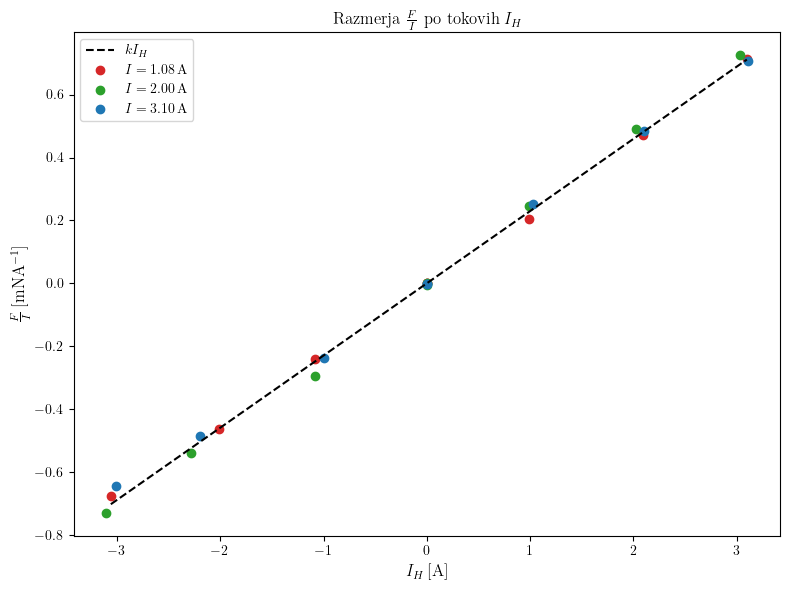

In [10]:
fig, ax = plt.subplots(1, 1, figsize=[8, 6])

ax.scatter(I_H[0], 1e3 * F_by_I[0], label=r'$I = 1.08\,\mathrm{A}$', color='tab:red')
ax.scatter(I_H[1], 1e3 * F_by_I[1], label=r'$I = 2.00\,\mathrm{A}$', color='tab:green')
ax.scatter(I_H[2], 1e3 * F_by_I[2], label=r'$I = 3.10\,\mathrm{A}$', color='tab:blue')
ax.plot(I_H[0], 1e3 * A * μ_0*N*S*N_H*I_H[0] / (R_H * r), label=r'$k I_H$', color='black', linestyle='--')

ax.set_title(r'Razmerja $\frac{F}{I}$ po tokovih $I_H$')
ax.set_xlabel(r'$I_H\,[\mathrm{A}]$')
ax.set_ylabel(r'$\frac{F}{I}\,[\mathrm{mNA^{-1}}]$')
ax.legend()
fig.tight_layout()